In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 

## OpenFoam solver

In [2]:
probePath = "./simpleColumn/postProcessing/probes/0.000/h"
widths = [14]*6
names = ['Time'] + [f"Probe {i}" for i in range(5)]
OpenFoamData_h = pd.read_fwf(probePath, widths=widths,skiprows=7,names=names)

In [3]:
probePath = "./simpleColumn/postProcessing/probes/0.000/theta"
widths = [14]*6
names = ['Time'] + [f"Probe {i}" for i in range(5)]
OpenFoamData_theta = pd.read_fwf(probePath, widths=widths,skiprows=7,names=names)

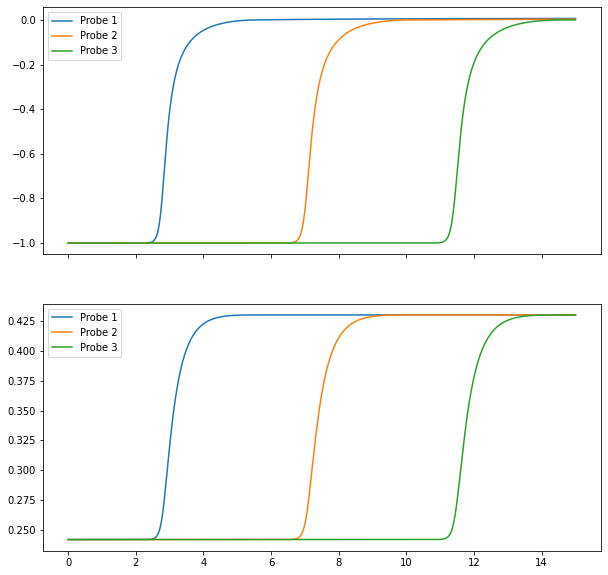

In [4]:
fig,axs = plt.subplots(2,1,sharex=True,figsize=[10,10])
for probe in names[2:-1]:
    axs[0].plot(OpenFoamData_h['Time']/3600,OpenFoamData_h[probe],label=probe)
    axs[1].plot(OpenFoamData_theta['Time']/3600,OpenFoamData_theta[probe],label=probe)

for ax in axs:
    ax.legend()
plt.show()

## Hydrus-1D

In [5]:
probePath = "./simpleColumn_Hydrus1D/Orgogozo2014/ORGOGOZO/Obs_Node.out"  
with open(probePath,'r') as f:
    rawHydrusData = f.readlines()[11:-1]
    rawHydrusData = [line.strip() for line in rawHydrusData]
    rawHydrusData = [re.sub("[ ]+", ",", line) for line in rawHydrusData]
    rawHydrusData = np.array([[float(i) for i in line.split(",")] for line in rawHydrusData])

names = ['Time'] + ['head_1','theta_1','flux_1'] + ['head_2','theta_2','flux_2'] + ['head_3','theta_3','flux_3']
HydrusData = pd.DataFrame(rawHydrusData,columns=names)

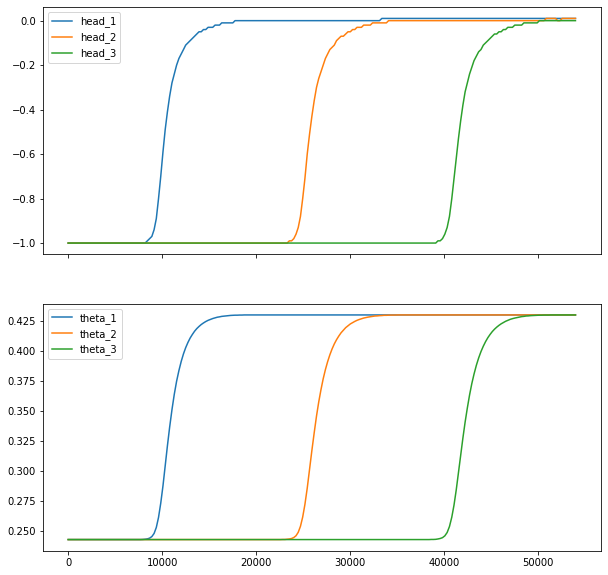

In [6]:
fig,axs = plt.subplots(2,1,sharex=True,figsize=[10,10])
for probe in names[1:]:
    if "head" in probe:
        axs[0].plot(HydrusData['Time'],HydrusData[probe],label=probe)
    elif "theta" in probe:
        axs[1].plot(HydrusData['Time'],HydrusData[probe],label=probe)

for ax in axs:
    ax.legend()
plt.show()

## PFLOTRAN

In [7]:
probePath = "./simpleColumn_PFLOTRAN/100_z-obs-0.pft"
with open(probePath,'r') as f:
    names = f.readline()
names = names.lstrip().replace('"','').replace('\n','').split(",")
names = [re.sub("[\(].*?[\)]", "", name) for name in names]
widths = [14]*len(names)

PFLOTRANData = pd.read_fwf(probePath, widths=widths, skiprows=1,names=names)
#PFLOTRANData["h (m)"] = (PFLOTRANData["Liquid Pressure Pa"]-101325)/9806.38

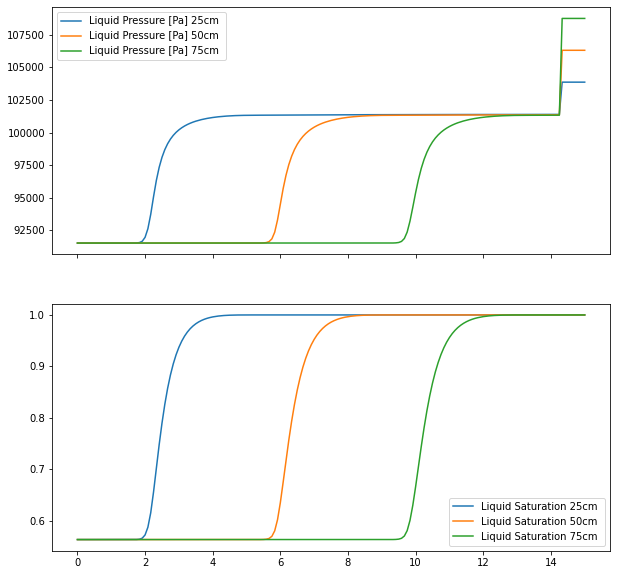

In [8]:
fig,axs = plt.subplots(2,1,sharex=True,figsize=[10,10])
for probe in names[1:]:
    if "Pressure" in probe:
        axs[0].plot(PFLOTRANData['Time [hour]'],PFLOTRANData[probe],label=probe)
    elif "Saturation" in probe:
        axs[1].plot(PFLOTRANData['Time [hour]'],PFLOTRANData[probe],label=probe)

for ax in axs:
    ax.legend()
plt.show()

## RichardsFoam3

In [9]:
probePath = "./simpleColumn_RichardsFoam/postProcessing/probes/0/H"
widths = [14]*6
names = ['Time'] + [f"Probe {i}" for i in range(5)]
RichardsFoamData_h = pd.read_fwf(probePath, widths=widths,skiprows=7,names=names)

RichardsFoamData_h["Probe 1"] = RichardsFoamData_h["Probe 1"] + 0.25 - 1
RichardsFoamData_h["Probe 2"] = RichardsFoamData_h["Probe 2"] + 0.50 - 1
RichardsFoamData_h["Probe 3"] = RichardsFoamData_h["Probe 3"] + 0.75 - 1

In [10]:
probePath = "./simpleColumn_RichardsFoam/postProcessing/probes/0/theta"
widths = [14]*6
names = ['Time'] + [f"Probe {i}" for i in range(5)]
RichardsFoamData_theta = pd.read_fwf(probePath, widths=widths,skiprows=7,names=names)

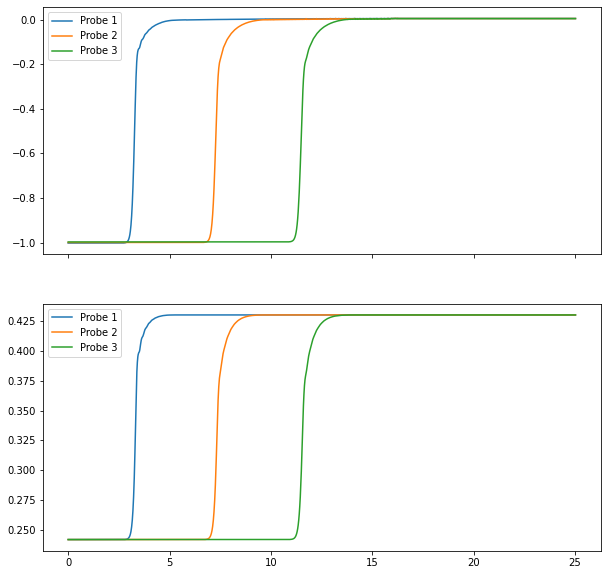

In [11]:
fig,axs = plt.subplots(2,1,sharex=True,figsize=[10,10])
for probe in names[2:-1]:
    axs[0].plot(RichardsFoamData_h['Time']/3600,RichardsFoamData_h[probe],label=probe)
    axs[1].plot(RichardsFoamData_theta['Time']/3600,RichardsFoamData_theta[probe],label=probe)

for ax in axs:
    ax.legend()
plt.show()

## Head comparison

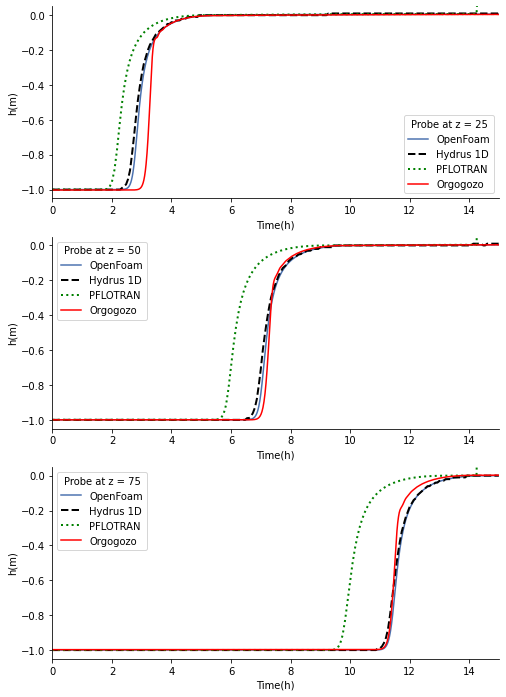

In [12]:
#with plt.xkcd():
with plt.style.context('seaborn-deep'):
    fig,axs = plt.subplots(3,figsize=(8,12))
    for ax,probe in zip(axs,OpenFoamData_h.columns[2:-1]):
        ax.plot(OpenFoamData_h['Time']/3600,OpenFoamData_h[probe],label="OpenFoam")
    
    for ax,probe in zip(axs,[i for i in HydrusData.columns[1:] if "head" in i]):
        ax.plot(HydrusData['Time']/3600,HydrusData[probe],ls='dashed',c='k',lw=2,label="Hydrus 1D")

    for ax,probe in zip(axs,[i for i in PFLOTRANData.columns[1:] if "Pressure" in i]):
        ax.plot(PFLOTRANData['Time [hour]'],(PFLOTRANData[probe]-101325)/9806.38,ls='dotted',c='g',lw=2, label="PFLOTRAN")

    for ax,probe in zip(axs,RichardsFoamData_h.columns[2:-1]):
        ax.plot(RichardsFoamData_h['Time']/3600,RichardsFoamData_h[probe],c='r',lw=1.5, label="Orgogozo")
    
    for ax in axs:
        ax.set(ylabel="h(m)",xlabel="Time(h)",xlim=[0,15],ylim=[-1.05,.05])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    for ax,depth in zip(axs,(25,50,75)):
        ax.legend(title=f"Probe at z = {depth}")
    plt.show()

## Water content comparison

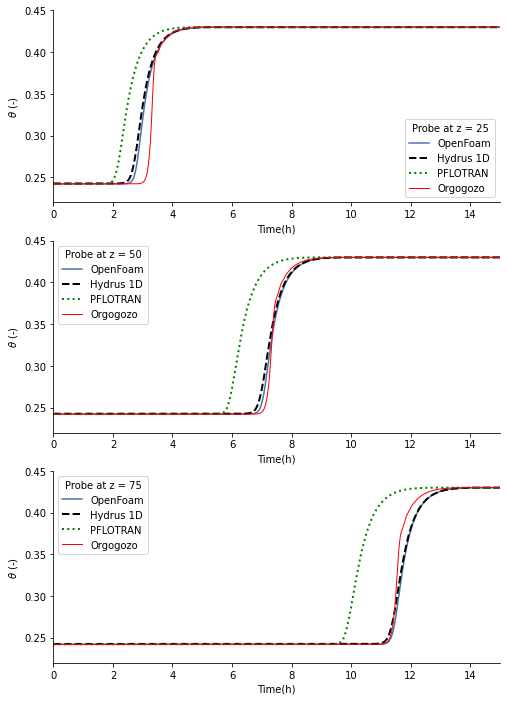

In [13]:
#with plt.xkcd():
with plt.style.context('seaborn-deep'):
    fig,axs = plt.subplots(3,figsize=(8,12))
    for ax,probe in zip(axs,OpenFoamData_theta.columns[2:-1]):
        ax.plot(OpenFoamData_theta['Time']/3600,OpenFoamData_theta[probe],label="OpenFoam")
    
    for ax,probe in zip(axs,[i for i in HydrusData.columns[1:] if "theta" in i]):
        ax.plot(HydrusData['Time']/3600,HydrusData[probe],ls='dashed',c='k',lw=2,label="Hydrus 1D")

    for ax,probe in zip(axs,[i for i in PFLOTRANData.columns[1:] if "Saturation" in i]):
        ax.plot(PFLOTRANData['Time [hour]'],PFLOTRANData[probe]*0.430,ls='dotted',c='g',lw=2, label="PFLOTRAN")

    for ax,probe in zip(axs,RichardsFoamData_theta.columns[2:-1]):
        ax.plot(RichardsFoamData_theta['Time']/3600,RichardsFoamData_theta[probe],c='r',lw=1, label="Orgogozo")
    
    for ax in axs:
        ax.set(ylabel=r"$\theta$ (-)",xlabel="Time(h)",xlim=[0,15],ylim=[0.22,0.45])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    for ax,depth in zip(axs,(25,50,75)):
        ax.legend(title=f"Probe at z = {depth}")
    plt.show()

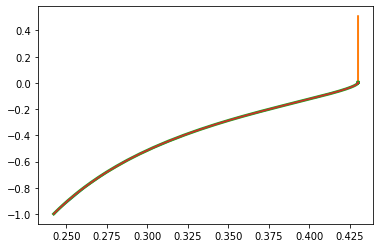

In [14]:
plt.plot(HydrusData['theta_2'],HydrusData['head_2'],lw=1)
plt.plot(PFLOTRANData['Liquid Saturation 50cm ']*0.43,(PFLOTRANData['Liquid Pressure [Pa] 50cm ']-101325)/9806.38, lw=2)
plt.plot(RichardsFoamData_theta['Probe 2'], RichardsFoamData_h['Probe 2'],lw=3)
plt.plot(OpenFoamData_theta['Probe 2'],OpenFoamData_h['Probe 2'])
plt.show()

In [15]:
OpenFoamData_h

,Time,Probe 0,Probe 1,Probe 2,Probe 3,Probe 4
0,1.0000,-0.242902,-1.000000,-1.000000,-1.000000,-1.00001
1,2.1000,-0.201418,-1.000000,-1.000000,-1.000000,-1.00002
2,3.3100,-0.166312,-1.000000,-1.000000,-1.000000,-1.00003
3,4.6410,-0.136831,-1.000000,-1.000000,-1.000000,-1.00003
4,6.1051,-0.112548,-1.000000,-1.000000,-1.000000,-1.00004
...,...,...,...,...,...,...
1821,53879.1000,0.009935,0.006661,0.003388,0.000115,-1.04570
1822,53909.1000,0.009935,0.006662,0.003389,0.000116,-1.04571
1823,53939.1000,0.009935,0.006662,0.003389,0.000116,-1.04572
1824,53969.1000,0.009935,0.006661,0.003388,0.000114,-1.04573


In [16]:
HydrusData

,Time,head_1,theta_1,flux_1,head_2,theta_2,flux_2,head_3,theta_3,flux_3
0,1.0000,-1.00,0.2426,-4.110000e-09,-1.00,0.2426,-4.110000e-09,-1.0,0.2426,-4.110000e-09
1,2.3000,-1.00,0.2426,-4.110000e-09,-1.00,0.2426,-4.110000e-09,-1.0,0.2426,-4.110000e-09
2,3.6000,-1.00,0.2426,-4.110000e-09,-1.00,0.2426,-4.110000e-09,-1.0,0.2426,-4.110000e-09
3,5.2900,-1.00,0.2426,-4.110000e-09,-1.00,0.2426,-4.110000e-09,-1.0,0.2426,-4.110000e-09
4,6.9800,-1.00,0.2426,-4.110000e-09,-1.00,0.2426,-4.110000e-09,-1.0,0.2426,-4.110000e-09
...,...,...,...,...,...,...,...,...,...,...
274,53054.1287,0.01,0.4300,-2.920000e-06,0.01,0.4300,-2.920000e-06,0.0,0.4300,-2.910000e-06
275,53290.5966,0.01,0.4300,-2.920000e-06,0.01,0.4300,-2.920000e-06,0.0,0.4300,-2.920000e-06
276,53527.0644,0.01,0.4300,-2.920000e-06,0.01,0.4300,-2.920000e-06,0.0,0.4300,-2.920000e-06
277,53763.5322,0.01,0.4300,-2.920000e-06,0.01,0.4300,-2.920000e-06,0.0,0.4300,-2.920000e-06
